In [8]:
import numpy as np
import pandas as pd
import torch
import sys
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append('/home/benoit.sautydechalon/deformetrica')

from deformetrica.core.estimator_tools.samplers.srw_mhwg_sampler import SrwMhwgSampler
from deformetrica.core.estimators.gradient_ascent import GradientAscent
from deformetrica.core.estimators.mcmc_saem import McmcSaem
# Estimators
from deformetrica.core.estimators.scipy_optimize import ScipyOptimize
from deformetrica.core.model_tools.manifolds.exponential_factory import ExponentialFactory
from deformetrica.core.model_tools.manifolds.generic_spatiotemporal_reference_frame import GenericSpatiotemporalReferenceFrame
from deformetrica.core.models.longitudinal_metric_learning import LongitudinalMetricLearning
from deformetrica.core.models.model_functions import create_regular_grid_of_points
from deformetrica.in_out.array_readers_and_writers import read_2D_array
from deformetrica.in_out.dataset_functions import read_and_create_scalar_dataset, read_and_create_image_dataset
from deformetrica.support.probability_distributions.multi_scalar_normal_distribution import MultiScalarNormalDistribution
from deformetrica.support.utilities.general_settings import Settings
from deformetrica import estimate_longitudinal_metric_model
from deformetrica.in_out.array_readers_and_writers import *
from deformetrica.launch.estimate_longitudinal_metric_model import instantiate_longitudinal_metric_model
import deformetrica as dfca

In [4]:
path = 'simulated_study/'
output_folder = 'output_1/'

## 1. Loading the individual parameters and raw data

In [7]:
rer = np.load(path+output_folder+'LongitudinalMetricModel__EstimatedParameters__IndividualRandomEffectsSamples.npy', 
              allow_pickle=True)[()]
trajectories = np.load(path+output_folder+'LongitudinalMetricModel__EstimatedParameters__Trajectory.npy',
       allow_pickle=True)[()]
ids = pd.read_csv(path+output_folder+'LongitudinalMetricModel_subject_ids_unique.txt', header=None).values

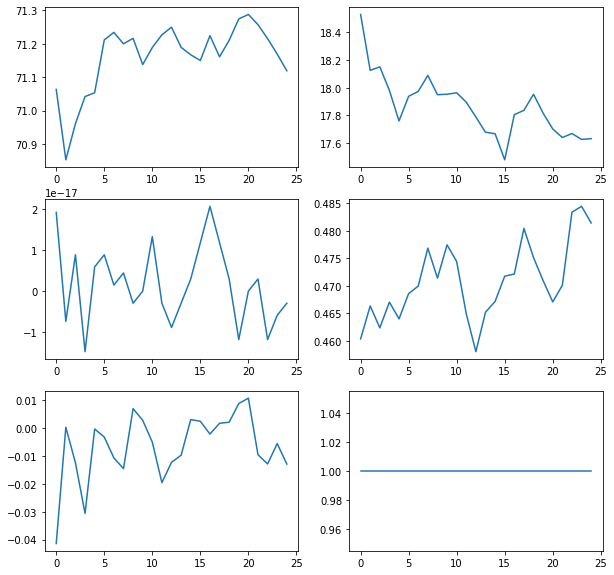

In [8]:
# Plot the non burn-in iterations
fig, axes = plt.subplots(3,2, figsize=(10,10))

axes[0][0].plot(rer['onset_age'].mean(axis=1))
axes[0][1].plot(rer['onset_age'].std(axis=1))
axes[1][0].plot(rer['log_acceleration'].mean(axis=1))
axes[1][1].plot(rer['log_acceleration'].std(axis=1))
axes[2][0].plot(rer['sources'].mean(axis=1))
axes[2][1].plot(rer['sources'].std(axis=1))

plt.show()

In [8]:
# Then in the required format for the deformetrica model

rer['onset_age'] = rer['onset_age'].mean(axis=0)
rer['log_acceleration'] = rer['log_acceleration'].mean(axis=0)
rer['sources'] = np.array([[source] for source in rer['sources'].mean(axis=0)])
averaged_rer = rer
averaged_rer

{'onset_age': array([ 62.59649948,  72.69495126,  68.13860528,  65.72744611,
         73.68372648,  45.09352123,  75.64105321,  63.56004699,
         66.3817125 ,  66.47202216,  73.32065739,  74.33868609,
         59.92360746,  65.43072892,  72.22933622,  83.0860822 ,
         68.02523715,  74.62303225,  73.70554718,  91.72619058,
         70.85352523,  58.12076807,  67.32010606,  74.71077121,
         71.02180202,  75.88978857,  73.46717662,  80.74650139,
         76.0347742 ,  76.20798113,  70.68556353,  62.0846136 ,
         68.28574934,  70.54173963,  83.58509649,  63.48011542,
         70.69872007,  69.7747623 ,  70.93190501,  66.6935943 ,
         56.24339429,  63.99445577,  74.05701774,  76.09095639,
         79.06440227,  76.44994879,  74.37686522,  65.90822588,
         69.02850462,  60.3933798 ,  73.5770306 ,  59.02768338,
         49.66130514,  63.58397756,  57.04343801,  61.44475125,
         71.19780958,  74.38749991,  69.29274564,  78.15996278,
         72.03295453,  78.7

In [9]:
# First we put them in a dataframe for visualization purpose

ip = pd.DataFrame(columns=['tau','xi','source'], index=[int(idx[0]) for idx in ids])
ip['tau'] = rer['onset_age'].mean(axis=0)
ip['xi'] = rer['log_acceleration'].mean(axis=0)
ip['source'] = rer['sources'].mean(axis=0)

ip

ValueError: Length of values (1) does not match length of index (100)

In [22]:
data = pd.DataFrame(index=[ids, times], columns=['adas_memory', 'hippocampus'])
data['adas_memory'] = adas_memory
data['hippocampus'] = hippocampus
data

adas_memory  hippocampus
4    74.868477     0.407333     0.377389
     75.075706     0.518444     0.375055
     75.282936     0.466667     0.364087
     75.490158     0.540667     0.382969
     76.111847     0.511111     0.429288
...                     ...          ...
1425 78.461342     0.540667     0.242699
     79.093491     0.607333     0.267690
1430 84.350166     0.577778     0.745385
     84.780472     0.659333     0.774981
     86.071396     0.770444     0.804698

[942 rows x 2 columns]

In [9]:
times = [time[0] for time in pd.read_csv(path+'/simulated_data_1/X.csv', header=None).values]
logistic = [score[0] for score in pd.read_csv(path+'/simulated_data_1/Y.csv', header=None).values]
sum_logistic = [score[1] for score in pd.read_csv(path+'/simulated_data_1/Y.csv', header=None).values]
ids = [int(idx[0]) for idx in pd.read_csv(path+'/output_1/LongitudinalMetricModel_subject_ids.txt', header=None).values]

In [10]:
data = pd.DataFrame(index=[ids, times], columns=['logistic', 'sum_logistic'])
data['logistic'] = logistic
data['sum_logistic'] = sum_logistic
data

logistic  sum_logistic
0   55.764067  0.423630      0.464063
    56.264067  0.440336      0.495255
    56.764067  0.447971      0.458690
    57.264067  0.494731      0.481166
    57.764067  0.502920      0.452465
...                 ...           ...
299 67.810785  0.587139      0.691150
    68.310785  0.549751      0.697607
    68.810785  0.570529      0.693200
    69.310785  0.577374      0.736736
    69.810785  0.578576      0.746236

[2400 rows x 2 columns]

In [11]:
individual_parameters = pd.read_csv(path+'/simulated_data_1/true_individual_parameters.csv').set_index('Unnamed: 0')
individual_parameters.index.name = 'ID'
individual_parameters

,xi,tau,source
ID,,,
0,-0.042195,65.204252,14.855125
1,0.277844,72.614263,-4.664902
2,-0.448266,62.417224,11.654640
3,0.687274,78.584107,10.606578
4,0.474100,88.115856,-4.351091
...,...,...,...
295,-0.266133,89.821899,-14.452402
296,0.578161,85.970123,-4.993718
297,0.419483,77.756186,-1.596787


In [12]:
estimated_parameters = pd.read_csv(path+'/simulated_data_1/estimated_parameters.csv').set_index('Unnamed: 0')
estimated_parameters.index.name = 'ID'
estimated_parameters

,onset_age,log_acceleration,sources
ID,,,
0,69.144816,-0.021186,[-0.43008312]
1,62.753088,0.210228,[0.1060195]
2,63.301992,-0.012229,[-0.05365707]
3,66.616826,0.025740,[-0.16978468]
4,86.523983,0.076229,[0.25671498]
...,...,...,...
295,79.948450,0.026114,[0.52830676]
296,69.320487,-0.014097,[0.32120917]
297,72.507572,-0.010242,[0.14904595]


In [5]:
tau = [tau[0] for tau in pd.read_csv(path+'/preprocessing_test_2/2_gradient_descent_on_the_mode/LongitudinalMetricModel_onset_ages.txt', header=None).values]
xi = [xi[0] for xi in pd.read_csv(path+'/preprocessing_test_2/2_gradient_descent_on_the_mode/LongitudinalMetricModel_log_accelerations.txt', header=None).values]
sources = [np.float(sources) for sources in pd.read_csv(path+'/preprocessing_test_2/2_gradient_descent_on_the_mode/LongitudinalMetricModel_sources.txt', header=None).values]

individual_parameters_after_initialization = pd.DataFrame(columns=individual_parameters.columns, index=individual_parameters.index)
individual_parameters_after_initialization['tau'] = tau
individual_parameters_after_initialization['xi'] = xi
individual_parameters_after_initialization['source'] = sources

NameError: name 'individual_parameters' is not defined

In [14]:
tau = [tau[0] for tau in pd.read_csv(path+output_folder+'LongitudinalMetricModel_onset_ages.txt', header=None).values]
xi = [xi[0] for xi in pd.read_csv(path+output_folder+'LongitudinalMetricModel_log_accelerations.txt', header=None).values]
sources = [np.float(sources) for sources in pd.read_csv(path+output_folder+'LongitudinalMetricModel_sources.txt', header=None).values]

estimated_ip = pd.DataFrame(columns=individual_parameters.columns, index=individual_parameters.index)
estimated_ip['tau'] = tau
estimated_ip['xi'] = xi
estimated_ip['source'] = sources

In [32]:
path = 'mds_study'
times = [time[0] for time in pd.read_csv(path+'/output/LongitudinalMetricModel_absolute_times.txt', header=None).values]
mds1 = [score[0] for score in pd.read_csv(path+'/mds_data/MDS_values.csv', header=None).values]
mds2 = [score[1] for score in pd.read_csv(path+'/mds_data/MDS_values.csv', header=None).values]
ids = [int(idx[0]) for idx in pd.read_csv(path+'/output/LongitudinalMetricModel_subject_ids.txt', header=None).values]

In [33]:
data = pd.DataFrame(index=[ids, times], columns=['mds1', 'mds2'])
data['mds1'] = mds1
data['mds2'] = mds2
data

mds1      mds2
3001 59.910362  0.500000  0.133333
     59.982315  0.571429  0.133333
     60.215916  0.500000  0.133333
     60.449516  0.500000  0.200000
     60.683113  0.571429  0.200000
...                  ...       ...
3467 71.582550  0.500000  0.733333
     71.708649  0.714286  0.800000
     71.957832  0.357143  0.733333
     72.333115  0.357143  0.666667
     72.708397  0.357143  0.733333

[3000 rows x 2 columns]

In [35]:
reconstructed = pd.read_csv('mds_study/personalize_output/LongitudinalMetricModel_reconstructed_values.txt', sep=' ', header=None)
reconstructed.columns = ['mds1', 'mds2']
reconstructed.index = data.index

In [36]:
abs(reconstructed-data).describe()

,mds1,mds2
count,3000.000000,3000.000000
mean,0.163081,0.180404
std,0.134820,0.168752
min,0.000148,0.000094
25%,0.061791,0.060085
50%,0.131837,0.135601
75%,0.231493,0.250328
max,1.103094,2.036188


## 2. Evaluating the reconstruction error

In [15]:
estimated_parameters = pd.read_csv(path+'/simulated_data_1/estimated_parameters.csv').set_index('Unnamed: 0')
estimated_parameters.index.name = 'ID'
estimated_parameters

,onset_age,log_acceleration,sources
ID,,,
0,69.144816,-0.021186,[-0.43008312]
1,62.753088,0.210228,[0.1060195]
2,63.301992,-0.012229,[-0.05365707]
3,66.616826,0.025740,[-0.16978468]
4,86.523983,0.076229,[0.25671498]
...,...,...,...
295,79.948450,0.026114,[0.52830676]
296,69.320487,-0.014097,[0.32120917]
297,72.507572,-0.010242,[0.14904595]


In [17]:
path = 'simulated_study'
args = {'verbosity':'INFO', 'output':'personalize',
        'model':path+'/model_1.xml', 'dataset':path+'/data_set.xml', 'parameters':path+'/optimization_parameters_saem.xml'}


"""
Read xml files, set general settings, and call the adapted function.
"""

xml_parameters = dfca.io.XmlParameters()
xml_parameters.read_all_xmls(args['model'],
                             args['dataset'],
                             args['parameters'])

logger = logging.getLogger(__name__)
logging.getLogger('matplotlib').setLevel(logging.ERROR)
logger.setLevel(logging.INFO)

In [18]:
dataset = read_and_create_scalar_dataset(xml_parameters)
model, individual_RER = instantiate_longitudinal_metric_model(xml_parameters, logger, dataset, observation_type='scalar')

213 good iterations out of 243
199 good iterations out of 239


In [19]:
onset_ages = torch.tensor(estimated_parameters['onset_age'])
log_accelerations = torch.tensor(estimated_parameters['log_acceleration'])
sources = torch.tensor([[float(source[1:-1])] for source in estimated_parameters['sources'].values])

In [20]:
v0, p0, metric_parameters, modulation_matrix = model._fixed_effects_to_torch_tensors(False)
#onset_ages, log_accelerations, sources = model._individual_RER_to_torch_tensors(individual_RER, False)
t0 = model.get_reference_time()

absolute_times = model._compute_absolute_times(dataset.times, log_accelerations, onset_ages)

absolute_times_to_write = []
for elt in absolute_times:
    for e in elt.cpu().data.numpy():
        absolute_times_to_write.append(e)

#np.savetxt(os.path.join(Settings().output_dir, "LongitudinalMetricModel_absolute_times.txt"), np.array(absolute_times_to_write))

model._update_spatiotemporal_reference_frame(absolute_times, p0, v0, metric_parameters,
                                            modulation_matrix)

195 good iterations out of 206
199 good iterations out of 239


In [21]:
predictions = []
subject_ids = []
times = []

targets = dataset.deformable_objects

number_of_subjects = dataset.number_of_subjects
residuals = []

for i in range(number_of_subjects):
    predictions_i = []
    for j, t in enumerate(absolute_times[i]):
        if sources is not None:
            prediction = model.spatiotemporal_reference_frame.get_position(t, sources=sources[i])
        else:
            prediction = model.spatiotemporal_reference_frame.get_position(t)
        predictions_i.append(prediction.cpu().data.numpy())
        predictions.append(prediction.cpu().data.numpy())
        subject_ids.append(dataset.subject_ids[i])
        times.append(dataset.times[i][j])

    targets_i = targets[i].cpu().data.numpy()


In [22]:
predicted = data.copy()
predicted['logistic'] = [prediction[0] for prediction in predictions]
predicted['sum_logistic'] = [prediction[1] for prediction in predictions]

In [23]:
diff = predicted - data
abs(diff).describe()

,logistic,sum_logistic
count,2400.000000,2400.000000
mean,0.029068,0.025118
std,0.026659,0.022953
min,0.000011,0.000005
25%,0.009966,0.009349
50%,0.020566,0.020780
75%,0.039812,0.035030
max,0.148954,0.292570


In [24]:
predicted.describe()

,logistic,sum_logistic
count,2400.000000,2400.000000
mean,0.505507,0.703421
std,0.137250,0.188794
min,0.290606,0.362755
25%,0.388722,0.540677
50%,0.507167,0.702799
75%,0.635137,0.866904
max,0.697885,1.035035


In [119]:
data.describe(percentiles=[.9])

,logistic,sum_logistic
count,2000.000000,2000.000000
mean,0.507838,0.661165
std,0.191308,0.237733
min,0.170156,0.258463
50%,0.508416,0.657581
90%,0.767370,0.994871
max,0.824501,1.040471


## Geodesic visualization

In [6]:
study = 'simulated_study/'
output_folder = 'output_1/'

geodesic = pd.read_csv(study+output_folder+'LongitudinalMetricModel_reference_geodesic_trajectory_values.txt', sep=' ', header=None)
source_pos = pd.read_csv(study+output_folder+'LongitudinalMetricModel_source_0_pos_0.9.txt', sep=' ', header=None)
source_neg = pd.read_csv(study+output_folder+'LongitudinalMetricModel_source_0_neg_0.9.txt', sep=' ', header=None)

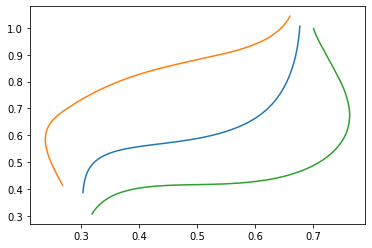

In [9]:
plt.plot(geodesic[0].values, geodesic[1].values)
plt.plot(source_pos[0].values, source_pos[1].values)
plt.plot(source_neg[0].values, source_neg[1].values)
plt.show()

## Plot the outputs for multivariate data

In [10]:
path = 'adni_study'
args = {'verbosity':'INFO', 'output':'personalize',
        'model':path+'/model_after_initialization_adni.xml', 'dataset':path+'/data_set.xml', 'parameters':path+'/optimization_parameters_saem.xml'}


"""
Read xml files, set general settings, and call the adapted function.
"""

xml_parameters = dfca.io.XmlParameters()
xml_parameters.read_all_xmls(args['model'],
                             args['dataset'],
                             args['parameters'])

logger = logging.getLogger(__name__)
logging.getLogger('matplotlib').setLevel(logging.ERROR)
logger.setLevel(logging.INFO)

In [11]:
dataset = read_and_create_scalar_dataset(xml_parameters)
model, individual_RER = instantiate_longitudinal_metric_model(xml_parameters, logger, dataset, observation_type='scalar')

189 good iterations out of 190
251 good iterations out of 252


In [12]:
spaceshifts = [-.8, -.5, -.2, 0, .2, .5, .8]

onset_ages = torch.tensor([70 for i in range(len(spaceshifts))])
log_accelerations = torch.tensor([0 for i in range(len(spaceshifts))])
sources = torch.tensor([[float(source)] for source in spaceshifts])

In [13]:
# Timepoints of visits

timepoints = [np.arange(40,100, 0.5) for i in range(len(onset_ages))]

In [14]:
v0, p0, metric_parameters, modulation_matrix = model._fixed_effects_to_torch_tensors(False)
#onset_ages, log_accelerations, sources = model._individual_RER_to_torch_tensors(individual_RER, False)
t0 = model.get_reference_time()

absolute_times = model._compute_absolute_times(np.array(timepoints), log_accelerations, onset_ages)

absolute_times_to_write = []
for elt in absolute_times:
    for e in elt.cpu().data.numpy():
        absolute_times_to_write.append(e)

#np.savetxt(os.path.join(Settings().output_dir, "LongitudinalMetricModel_absolute_times.txt"), np.array(absolute_times_to_write))

model._update_spatiotemporal_reference_frame(absolute_times, p0, v0, metric_parameters,
                                            modulation_matrix)

240 good iterations out of 241
236 good iterations out of 237


In [15]:
predictions = []
subject_ids = []
times = []

for i in range(len(absolute_times)):
    predictions_i = []
    for j, t in enumerate(absolute_times[i]):
        prediction = model.spatiotemporal_reference_frame.get_position(t, sources=sources[i])
        predictions_i.append(prediction.cpu().data.numpy())
        subject_ids.append(i)
        times.append(absolute_times[i][j])
    predictions.append(predictions_i)

In [16]:
feat_1 = [[prediction[0] for prediction in predictions[i]] for i in range(len(predictions))]
feat_2 = [[prediction[1] for prediction in predictions[i]] for i in range(len(predictions))]
feat_3 = [[prediction[2] for prediction in predictions[i]] for i in range(len(predictions))]

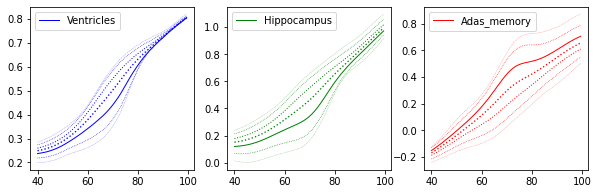

In [36]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for i in range(len(spaceshifts)):
    if i == 4:
        axes[0].plot(timepoints[0],feat_1[i], color='b', linewidth=(4-abs(i-3))/3, label='Ventricles')
        axes[1].plot(timepoints[0],feat_2[i], color='g', linewidth=(4-abs(i-3))/3, label='Hippocampus')
        axes[2].plot(timepoints[0],feat_3[i], color='r', linewidth=(4-abs(i-3))/3, label='Adas_memory')
    else:
        axes[0].plot(timepoints[0],feat_1[i], color='b', linewidth=(4-abs(i-3))/3, linestyle='dotted')
        axes[1].plot(timepoints[0],feat_2[i], color='g', linewidth=(4-abs(i-3))/3, linestyle='dotted')
        axes[2].plot(timepoints[0],feat_3[i], color='r', linewidth=(4-abs(i-3))/3, linestyle='dotted')

    axes[0].legend()
    axes[1].legend()
    axes[2].legend()

plt.show()

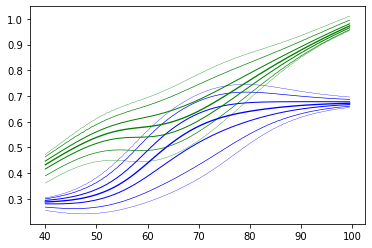

In [45]:
for i in range(7):
    plt.plot(timepoints[0], feat_1[i], color='b', linewidth=(4-abs(i-3))/3)
    plt.plot(timepoints[0], feat_2[i], color='g', linewidth=(4-abs(i-3))/3)
plt.show()